# Visualizing Raw Premier League Data (1)

The source for this first piece of data: https://www.football-data.co.uk/englandm.php

Notes for interpreting this data: https://www.football-data.co.uk/notes.txt

## Loading Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'../data/E0_2526.csv')
#df

First, check that the amount of matches per team is the same (as to not cause errors). 

In [2]:
#finding matches per team
teams = df['HomeTeam'].unique().tolist()

matches_per_team = {}
for team in teams:
    home_matches = df[df['HomeTeam'] == team].shape[0]
    away_matches = df[df['AwayTeam'] == team].shape[0]
    total_matches = home_matches + away_matches
    matches_per_team[team] = total_matches

In [3]:
matches_per_team

{'Liverpool': 26,
 'Aston Villa': 26,
 'Brighton': 26,
 'Sunderland': 26,
 'Tottenham': 26,
 'Wolves': 26,
 'Chelsea': 26,
 "Nott'm Forest": 26,
 'Man United': 26,
 'Leeds': 26,
 'West Ham': 26,
 'Man City': 26,
 'Bournemouth': 26,
 'Brentford': 26,
 'Burnley': 26,
 'Arsenal': 26,
 'Crystal Palace': 26,
 'Everton': 26,
 'Fulham': 26,
 'Newcastle': 26}

## Home Advantage Quantification

Goal Distributions: 

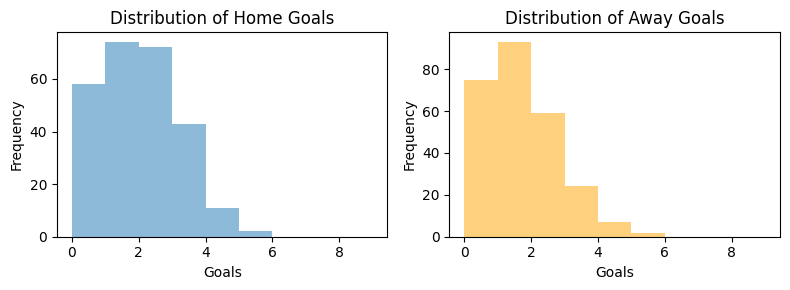

Average number of home goals: 1.54
Average number of away goals: 1.23


In [4]:
#histogram of FTAG and FTHG
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.hist(df['FTHG'], bins=range(0, 10), alpha=0.5, label='FTHG')
ax1.set_xlabel('Goals')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Home Goals')

ax2.hist(df['FTAG'], bins=range(0, 10), alpha=0.5, label='FTAG', color ='orange')
ax2.set_xlabel('Goals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Away Goals')
plt.tight_layout()
plt.show()

#average home goals:
average_home_goals = df['FTHG'].mean()
print("Average number of home goals: " + str(round(average_home_goals, 2)))

#average away goals:
average_away_goals = df['FTAG'].mean()
print("Average number of away goals: " + str(round(average_away_goals, 2)))

In [5]:
team_stats = []
for team in teams:
    home_goals_scored = df[df['HomeTeam'] == team]['FTHG'].mean()
    home_goals_conceded = df[df['HomeTeam'] == team]['FTAG'].mean()
    away_goals_scored = df[df['AwayTeam'] == team]['FTAG'].mean()
    away_goals_conceded = df[df['AwayTeam'] == team]['FTHG'].mean()
    
    team_stats.append({
        'Team': team,
        'meanHomeGoalsScored': home_goals_scored,
        'meanHomeGoalsConceded': home_goals_conceded,
        'meanAwayGoalsScored': away_goals_scored,
        'meanAwayGoalsConceded': away_goals_conceded,
        'meanHomeNetGD': home_goals_scored - home_goals_conceded,
        'meanAwayNetGD': away_goals_scored - away_goals_conceded
    })

team_stats_df = pd.DataFrame(team_stats)

In [6]:
for index, row in team_stats_df.iterrows():
    if (row['Team'].split()[-1] == 'United') or (row['Team'].split()[-1] == 'City'):
        team_stats_df.at[index, 'abbreviatedTeam'] = row['Team'].split()[0][:3].upper() + ' ' + row['Team'].split()[-1][:1].upper() + '.'
    else:
        team_stats_df.at[index, 'abbreviatedTeam'] = row['Team'][:3].upper()

In [7]:
team_stats_df

,Team,meanHomeGoalsScored,meanHomeGoalsConceded,meanAwayGoalsScored,meanAwayGoalsConceded,meanHomeNetGD,meanAwayNetGD,abbreviatedTeam
0,Liverpool,1.615385,1.076923,1.538462,1.615385,0.538462,-0.076923,LIV
1,Aston Villa,1.461538,0.769231,1.384615,1.307692,0.692308,0.076923,AST
2,Brighton,1.538462,1.076923,1.076923,1.538462,0.461538,-0.461538,BRI
3,Sunderland,1.615385,0.769231,0.461538,1.538462,0.846154,-1.076923,SUN
4,Tottenham,1.230769,1.384615,1.538462,1.461538,-0.153846,0.076923,TOT
5,Wolves,0.846154,2.153846,0.384615,1.538462,-1.307692,-1.153846,WOL
6,Chelsea,1.692308,1.153846,1.923077,1.153846,0.538462,0.769231,CHE
7,Nott'm Forest,1.000000,1.384615,0.923077,1.538462,-0.384615,-0.615385,NOT
8,Man United,1.923077,1.153846,1.692308,1.692308,0.769231,0.000000,MAN U.
9,Leeds,1.692308,1.384615,1.076923,2.076923,0.307692,-1.000000,LEE


Visualizing Home vs. Away Goal Averages by Team:

Average PPG at home: 1.56
Average PPG away: 1.18
Home advantage (points difference): 0.38

Match Outcome Distribution:
Home Win: 112 matches (43.1%)
Draw: 69 matches (26.5%)
Away Win: 79 matches (30.4%)


/var/folders/37/x29z3whn15g75lfs1dhqttd00000gn/T/ipykernel_18329/1511909129.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HomePoints'] = df.apply(lambda row: 3 if row['FTHG'] > row['FTAG'] else (1 if row['FTHG'] == row['FTAG'] else 0) if row['HomeTeam'] in team_stats_df['Team'].values else 0, axis=1)
/var/folders/37/x29z3whn15g75lfs1dhqttd00000gn/T/ipykernel_18329/1511909129.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AwayPoints'] = df.apply(lambda row: 3 if row['FTAG'] > row['FTHG'] else (1 if row['FTAG'

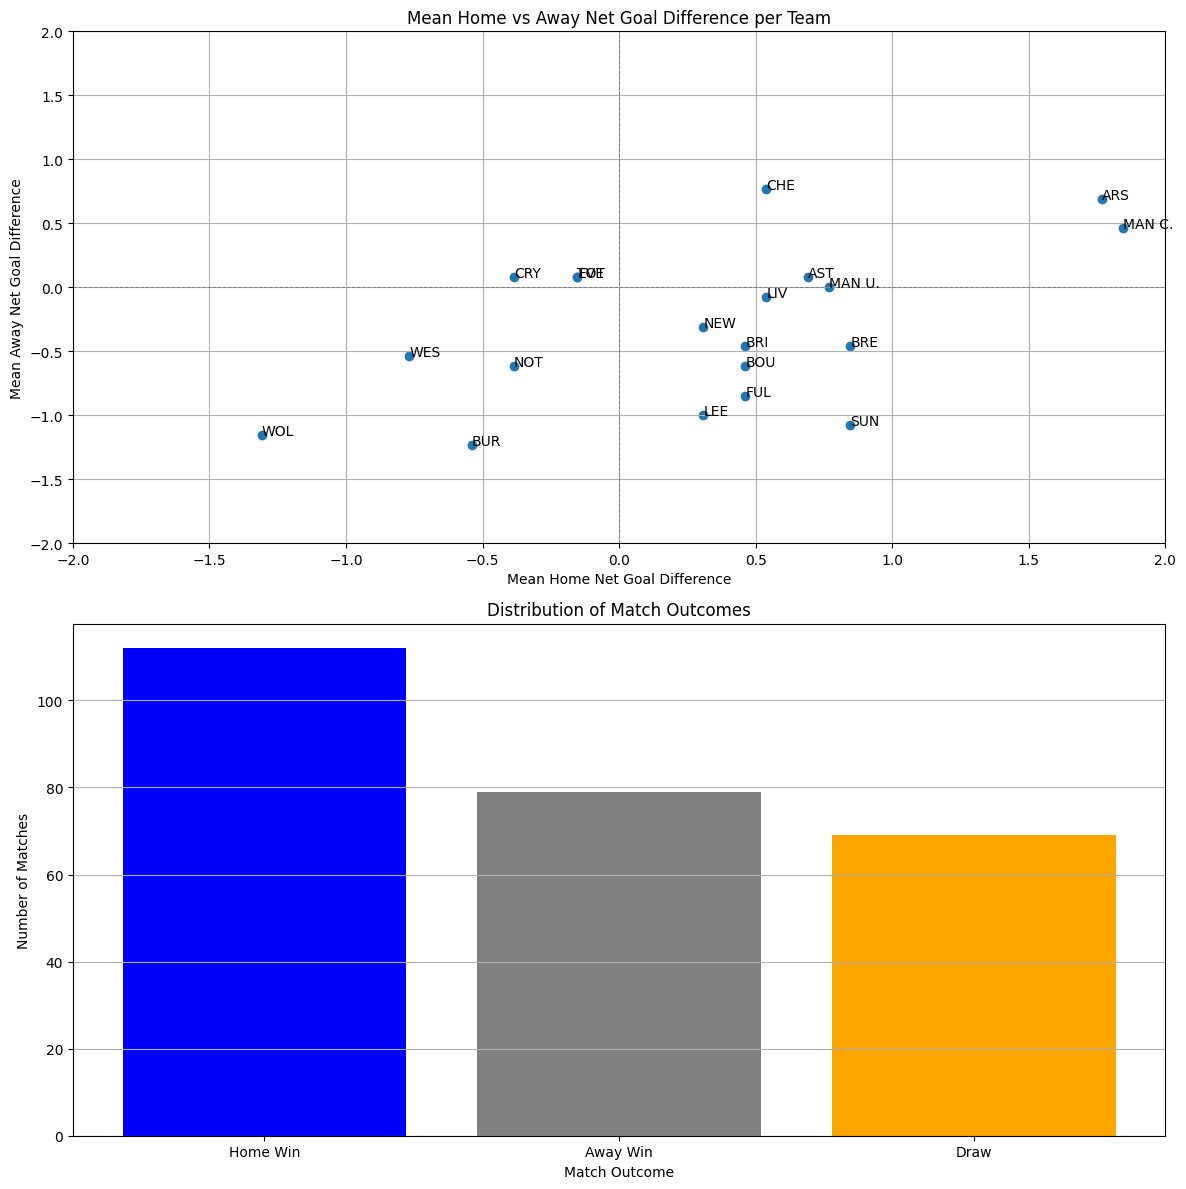

In [8]:
#Home vs. Away Net Goal Difference Scatter Plot

fig, ax = plt.subplots(2, figsize=(12, 12))

ax[0].scatter(team_stats_df['meanHomeNetGD'], team_stats_df['meanAwayNetGD'])
ax[0].set_xlabel('Mean Home Net Goal Difference')
ax[0].set_ylabel('Mean Away Net Goal Difference')
ax[0].set_title('Mean Home vs Away Net Goal Difference per Team')
for i, team in enumerate(team_stats_df['abbreviatedTeam']):
    ax[0].annotate(team, (team_stats_df['meanHomeNetGD'][i], team_stats_df['meanAwayNetGD'][i]))
ax[0].axhline(0, color='grey', linestyle='--', linewidth=0.7)
ax[0].axvline(0, color='grey', linestyle='--', linewidth=0.7)
ax[0].grid(True)
ax[0].axis([-2, 2, -2, 2])

#home vs. away points

#adding calculations
df['HomePoints'] = df.apply(lambda row: 3 if row['FTHG'] > row['FTAG'] else (1 if row['FTHG'] == row['FTAG'] else 0) if row['HomeTeam'] in team_stats_df['Team'].values else 0, axis=1)
df['AwayPoints'] = df.apply(lambda row: 3 if row['FTAG'] > row['FTHG'] else (1 if row['FTAG'] == row['FTHG'] else 0) if row['AwayTeam'] in team_stats_df['Team'].values else 0, axis=1)

avg_home_pts = df['HomePoints'].mean()
avg_away_pts = df['AwayPoints'].mean()

print(f"Average PPG at home: {avg_home_pts:.2f}")
print(f"Average PPG away: {avg_away_pts:.2f}")
print(f"Home advantage (points difference): {avg_home_pts - avg_away_pts:.2f}")

#calculating points by team
home_points_by_team = df.groupby(['HomeTeam'])['HomePoints'].mean().reset_index()
away_points_by_team = df.groupby(['AwayTeam'])['AwayPoints'].mean().reset_index()

#Match Distribution: 
df['Outcome'] = df.apply(lambda row: 'Home Win' if row['FTHG'] > row['FTAG'] else ('Away Win' if row['FTAG'] > row['FTHG'] else 'Draw'), axis=1)

outcome_counts = df['Outcome'].value_counts()
outcome_percents = outcome_counts / len(df) * 100

print("=" * 20)

print("\nMatch Outcome Distribution:")
for outcome in ['Home Win', 'Draw', 'Away Win']:
    count = outcome_counts.get(outcome, 0)
    pct = outcome_percents.get(outcome, 0)
    print(f"{outcome}: {count} matches ({pct:.1f}%)")

ax[1].bar(outcome_counts.index, outcome_counts.values, color=['blue', 'grey', 'orange'])
ax[1].set_xlabel('Match Outcome')
ax[1].set_ylabel('Number of Matches')
ax[1].set_title('Distribution of Match Outcomes')
ax[1].grid(axis='y')
ax[1].tick_params(axis='x', labelrotation=0)
fig.tight_layout()

plt.show()

In [9]:
from scipy import stats

#test if these values are statistically significant (which they are)
t_stat, p_value = stats.ttest_rel(df['FTHG'], df['FTAG'])
print(f"\nPaired t-test for home vs away goals:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Home advantage is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}")


Paired t-test for home vs away goals:
t-statistic: 3.045
p-value: 0.002563
Home advantage is statistically significant


**Calculuating Home Advantage Coefficient (Poisson Models)**

## Let's go Deeper into Draw Rate (by Goal Total, by team, etc.)
This is crucial to see if simulations will work (and to plan how we'll set them up)

## Scoreline Heatmap

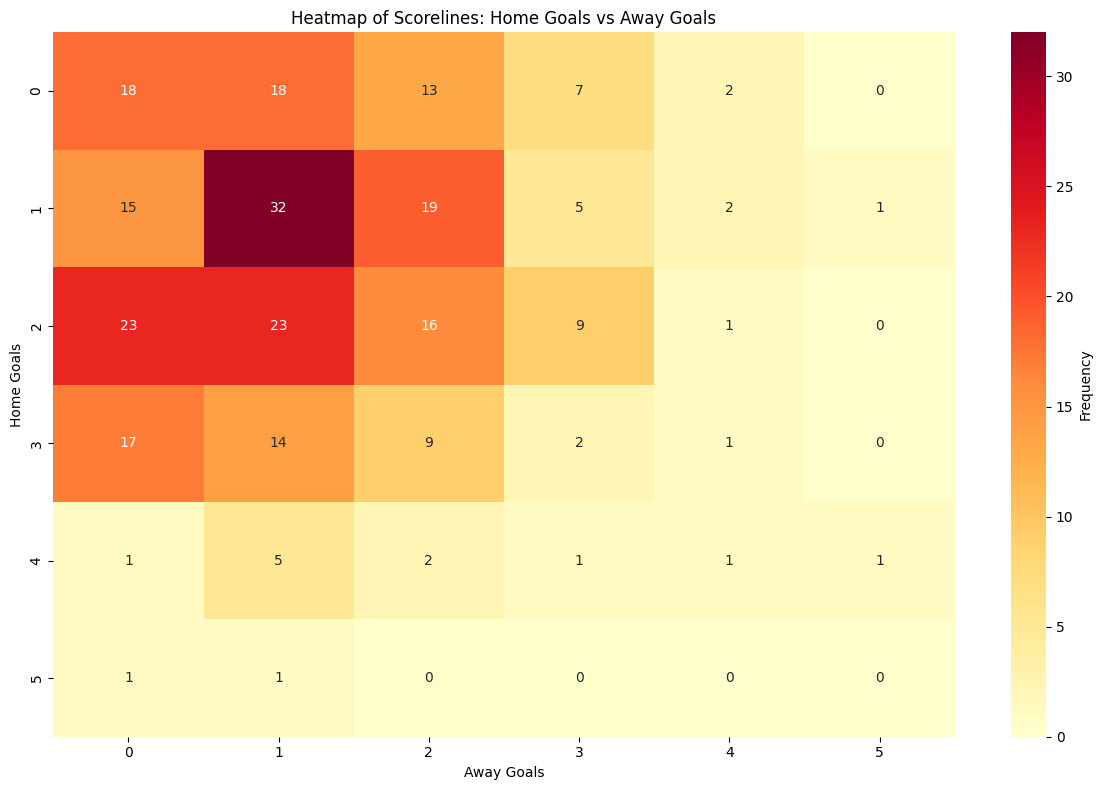

Total matches: 260
Total draws: 69
Draw frequency: 26.54%


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a crosstab of home goals vs away goals
scoreline_matrix = pd.crosstab(df['FTHG'], df['FTAG'])

# creating a heatmap to visualize the scoreline frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(scoreline_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Frequency'})
plt.xlabel('Away Goals')
plt.ylabel('Home Goals')
plt.title('Heatmap of Scorelines: Home Goals vs Away Goals')
plt.tight_layout()
plt.show()

# general stats
total_matches = len(df)
draws = (df['FTHG'] == df['FTAG']).sum()
draw_percentage = (draws / total_matches) * 100
print(f"Total matches: {total_matches}")
print(f"Total draws: {draws}")
print(f"Draw frequency: {draw_percentage:.2f}%")

### KEY: Draw Frequency was **26.52%**

Draw Distribution by Goal Total:
0-0 draws: 18 matches (26.1%)
1-1 draws: 32 matches (46.4%)
2-2 draws: 16 matches (23.2%)
3-3 draws: 2 matches (2.9%)
4-4 draws: 1 matches (1.4%)

(4-4 was Bournemouth vs. yANiTeD)



/var/folders/37/x29z3whn15g75lfs1dhqttd00000gn/T/ipykernel_18329/966857892.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  draws_df['GoalTotal'] = draws_df['FTHG'] #goals in the draw


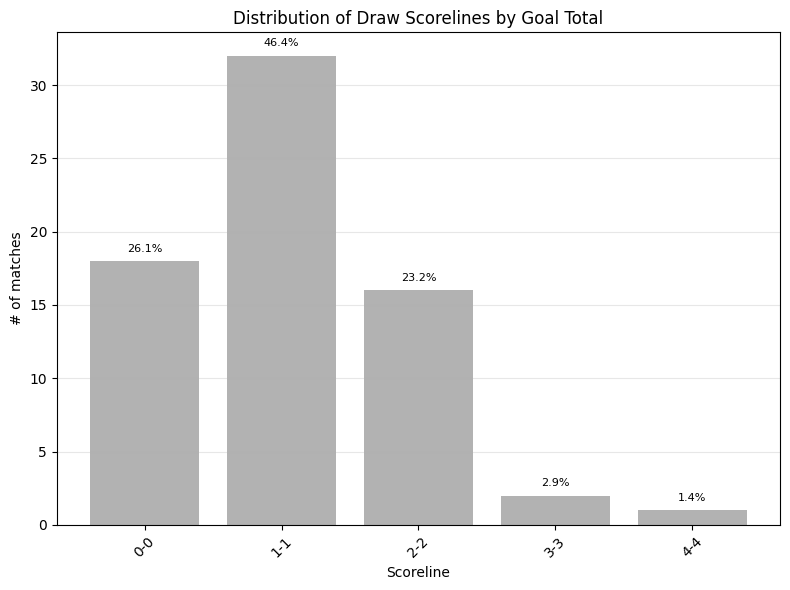


Insights for Monte-Carlo Sim.:
- Most common draw is a 1-1 draw; (32 matches)
- 26.1% of draws are 0-0
- # of draws with more than 2 goals: 19 matches (27.5% of total matches)


In [11]:
#checking for draws

draws_df = df[df['FTHG'] == df['FTAG']]
draws_df['GoalTotal'] = draws_df['FTHG'] #goals in the draw

draws_by_total = draws_df['GoalTotal'].value_counts().sort_index()

draws_by_total_pct = (draws_by_total / draws_by_total.sum() * 100).round(3)
print("Draw Distribution by Goal Total:")
print("="*30)

for g, cnt in draws_by_total.items():
    pct = draws_by_total_pct[g]
    print(f"{g}-{g} draws: {cnt} matches ({pct:.1f}%)")

print("\n(4-4 was Bournemouth vs. yANiTeD)\n")


plt.figure(figsize=(8, 6))
bars = plt.bar((draws_by_total.index).astype(str) + '-' + (draws_by_total.index).astype(str), 
               draws_by_total.values, color='grey', alpha=0.6)

plt.xlabel('Scoreline')
plt.ylabel('# of matches')
plt.title('Distribution of Draw Scorelines by Goal Total')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

#adding percentage labels
for bar, pct in zip(bars, draws_by_total_pct):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\nInsights for Monte-Carlo Sim.:")
print(f"- Most common draw is a {draws_by_total.idxmax()}-{draws_by_total.idxmax()} draw; ({draws_by_total.max()} matches)")
print(f"- {draws_by_total_pct.loc[0]:.1f}% of draws are 0-0")
print(f"- # of draws with more than 2 goals: {draws_by_total[draws_by_total.index >= 2].sum()} matches ({draws_by_total_pct[draws_by_total.index >= 2].sum():.1f}% of total matches)")

Calculating draw rate of each team (to quell my own curiosity)

Before writing: I'll bet Arsenal has the highest draw rate because they're so defensive (*llabmarah*)

After writing: I stand corrected. Brighton, wowza.


Draw rate by team:
          team  totalMatches  draws  drawRate
   Bournemouth            26     10     38.46
      Brighton            26     10     38.46
    Sunderland            26      9     34.62
    Man United            26      9     34.62
         Leeds            26      9     34.62
     Tottenham            26      8     30.77
       Chelsea            26      8     30.77
Crystal Palace            26      8     30.77
       Everton            26      7     26.92
     Liverpool            26      6     23.08
       Arsenal            26      6     23.08
       Burnley            26      6     23.08
      West Ham            26      6     23.08
 Nott'm Forest            26      6     23.08
        Wolves            26      6     23.08
     Newcastle            26      6     23.08
      Man City            26      5     19.23
   Aston Villa            26      5     19.23
     Brentford            26      4     15.38
        Fulham            26      4     15.38


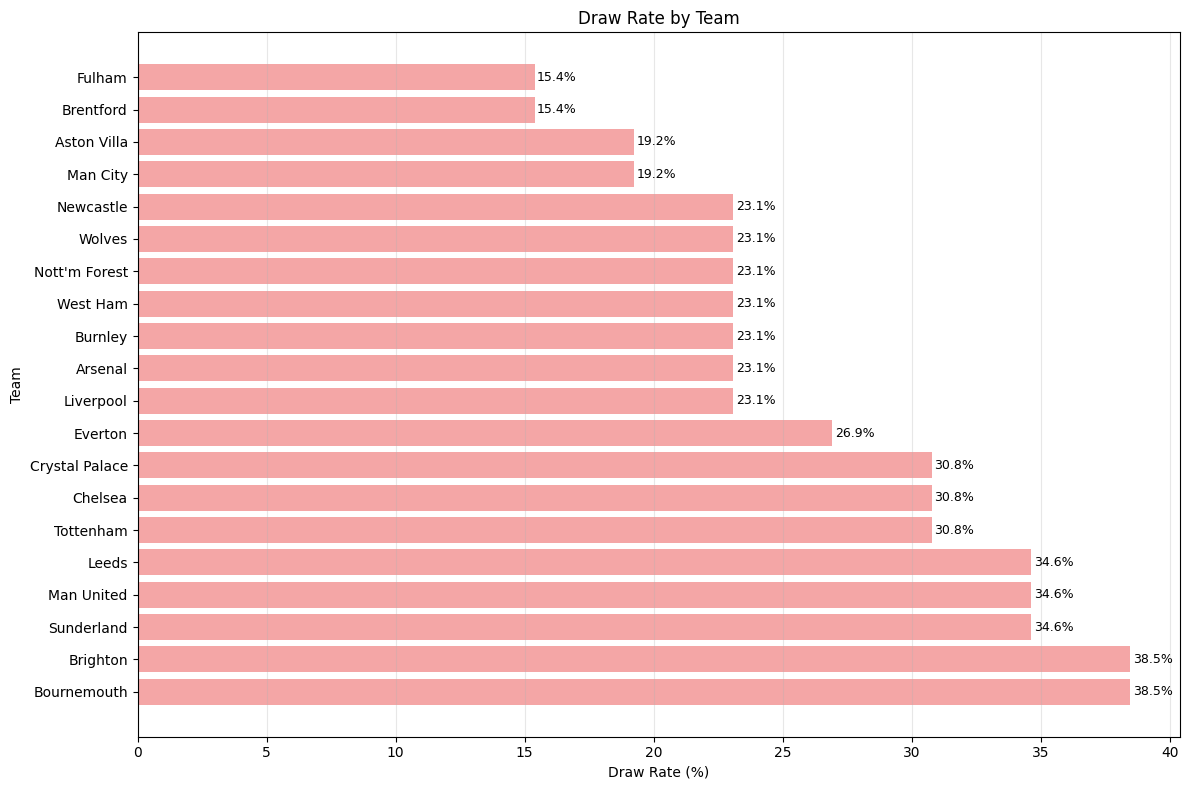


Team Draw Rate Statistics:
- Highest draw rate: Bournemouth (38.46%)
- Lowest draw rate: Fulham (15.38%)
- League average draw rate: 26.54%


In [12]:
team_draw_rates = []

for team in teams:
    #find all matches involving the team & how many there are
    team_matches = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    total_team_matches = len(team_matches)
    
    #then, find all draws that involve the team & how many there are
    team_draws = team_matches[team_matches['FTHG'] == team_matches['FTAG']]
    total_team_draws = len(team_draws)
    
    #checking just in case if we have zero matches to avoid division by 0
    draw_rate = (total_team_draws / total_team_matches * 100) if total_team_matches > 0 else 0

    #add entry to list, eventually will create a dataframe
    team_draw_rates.append({
        'team': team,
        'totalMatches': total_team_matches,
        'draws': total_team_draws,
        'drawRate': round(draw_rate, 2)
    })

#convert the list into a dataframe and sort the values based on lowest to highest draw rate
team_draws_df = pd.DataFrame(team_draw_rates).sort_values('drawRate', ascending=False)
print("\nDraw rate by team:")
print("=" * 40)
print(team_draws_df.to_string(index=False))

#vizualizing the draw rates:
plt.figure(figsize=(12, 8))
bars = plt.barh(team_draws_df['team'], team_draws_df['drawRate'], color='lightcoral', alpha=0.7)
plt.xlabel('Draw Rate (%)')
plt.ylabel('Team')
plt.title('Draw Rate by Team')
plt.grid(axis='x', alpha=0.3)

#add value labels for readability
for bar, rate in zip(bars, team_draws_df['drawRate']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{rate:.1f}%', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nTeam Draw Rate Statistics:")
print(f"- Highest draw rate: {team_draws_df.iloc[0]['team']} ({team_draws_df.iloc[0]['drawRate']}%)")
print(f"- Lowest draw rate: {team_draws_df.iloc[-1]['team']} ({team_draws_df.iloc[-1]['drawRate']}%)")

print(f"- League average draw rate: {draw_percentage:.2f}%")

### In Sum...

In [13]:
###Key insights (GENERATED BY AI for Consolidation)

print("\n" + "="*50)
print("MONTE CARLO SIMULATION CALIBRATION INSIGHTS")
print("="*50)

print(f"1. FIXED DRAW PROBABILITY: {draw_percentage:.2f}%")
print("   - Use this as baseline draw probability in simulations")

print(f"2. DRAW DISTRIBUTION BY GOALS:")
for goals in [0, 1, 2, 3, 4]:
    if goals in draws_by_total_pct.index:
        pct = draws_by_total_pct.loc[goals]
        print(f"   - {goals}-{goals}: {pct:.1f}% of all draws")

print("3. POISSON JOINT DISTRIBUTION CONSIDERATIONS:")
print(f"   - Raw Poisson would predict ~{((average_home_goals + average_away_goals) ** 2 * np.exp(-(average_home_goals + average_away_goals))):.1f}% draws")
print(f"   - Actual draw rate: {draw_percentage:.2f}%")
print(f"   - Adjustment needed: {draw_percentage / ((average_home_goals + average_away_goals) ** 2 * np.exp(-(average_home_goals + average_away_goals))) * 100:.1f}x")

print("4. TEAM-SPECIFIC DRAW RATES:")
print(f"   - Range: {team_draws_df['drawRate'].min():.1f}% to {team_draws_df['drawRate'].max():.1f}%")
print("   - Consider incorporating team defensive styles")


MONTE CARLO SIMULATION CALIBRATION INSIGHTS
1. FIXED DRAW PROBABILITY: 26.54%
   - Use this as baseline draw probability in simulations
2. DRAW DISTRIBUTION BY GOALS:
   - 0-0: 26.1% of all draws
   - 1-1: 46.4% of all draws
   - 2-2: 23.2% of all draws
   - 3-3: 2.9% of all draws
   - 4-4: 1.4% of all draws
3. POISSON JOINT DISTRIBUTION CONSIDERATIONS:
   - Raw Poisson would predict ~0.5% draws
   - Actual draw rate: 26.54%
   - Adjustment needed: 5530.3x
4. TEAM-SPECIFIC DRAW RATES:
   - Range: 15.4% to 38.5%
   - Consider incorporating team defensive styles
